# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | eregli
Processing Record 9 of Set 1 | akjoujt
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | hadibu
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | auki
Processing Record 22 of Set 1 | ham

Processing Record 25 of Set 12 | skowhegan
Processing Record 26 of Set 12 | pyhajarvi
Processing Record 27 of Set 12 | sola
Processing Record 28 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 29 of Set 12 | yuzhno-kurilsk
Processing Record 30 of Set 12 | agat village
Processing Record 31 of Set 12 | fort st. john
Processing Record 32 of Set 12 | ardakan
Processing Record 33 of Set 12 | acapulco de juarez
Processing Record 34 of Set 12 | port blair
Processing Record 35 of Set 12 | tanjung pinang
Processing Record 36 of Set 12 | ambodifotatra
Processing Record 37 of Set 12 | miquelon
Processing Record 38 of Set 12 | minuyan
Processing Record 39 of Set 12 | tabou
Processing Record 40 of Set 12 | koknese
Processing Record 41 of Set 12 | richards bay
Processing Record 42 of Set 12 | mahabe
City not found. Skipping...
Processing Record 43 of Set 12 | garachico
Processing Record 44 of Set 12 | esquina
Processing Record 45 of Set 12 | tsiroanomandidy
Processing Record 46 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,286.27,68,23,4.93,SH,1701129771
1,kodiak,57.7900,-152.4072,277.88,45,0,3.60,US,1701129772
2,utrik,11.2278,169.8474,300.85,74,74,8.54,MH,1701129773
3,yellowknife,62.4560,-114.3525,266.44,100,100,4.63,CA,1701129688
4,punta arenas,-53.1500,-70.9167,285.21,40,0,5.14,CL,1701129546


In [6]:
city_data_new = [(x - 273.15) for x in city_data_df["Max Temp"]]
city_data_df["Max Temp"] = city_data_new
city_data_new=[]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.12,68,23,4.93,SH,1701129771
1,kodiak,57.7900,-152.4072,4.73,45,0,3.60,US,1701129772
2,utrik,11.2278,169.8474,27.70,74,74,8.54,MH,1701129773
3,yellowknife,62.4560,-114.3525,-6.71,100,100,4.63,CA,1701129688
4,punta arenas,-53.1500,-70.9167,12.06,40,0,5.14,CL,1701129546


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.12,68,23,4.93,SH,1701129771
1,kodiak,57.7900,-152.4072,4.73,45,0,3.60,US,1701129772
2,utrik,11.2278,169.8474,27.70,74,74,8.54,MH,1701129773
3,yellowknife,62.4560,-114.3525,-6.71,100,100,4.63,CA,1701129688
4,punta arenas,-53.1500,-70.9167,12.06,40,0,5.14,CL,1701129546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

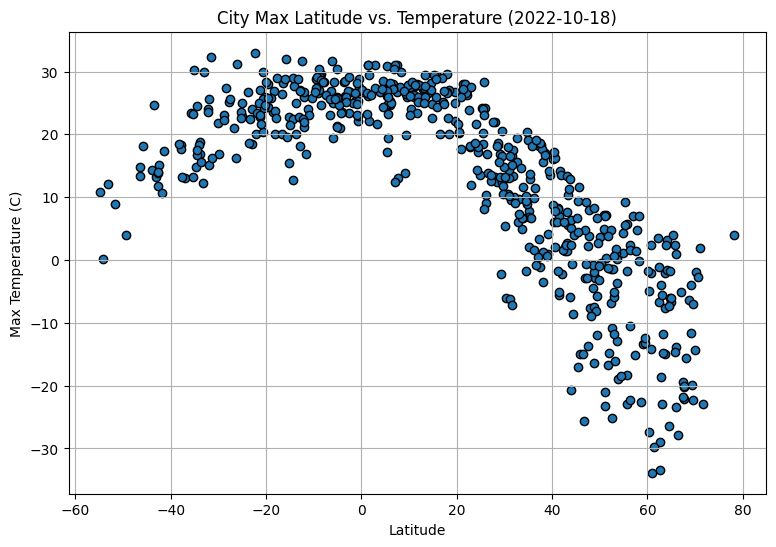

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
mt = city_data_df["Max Temp"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(lat, mt, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

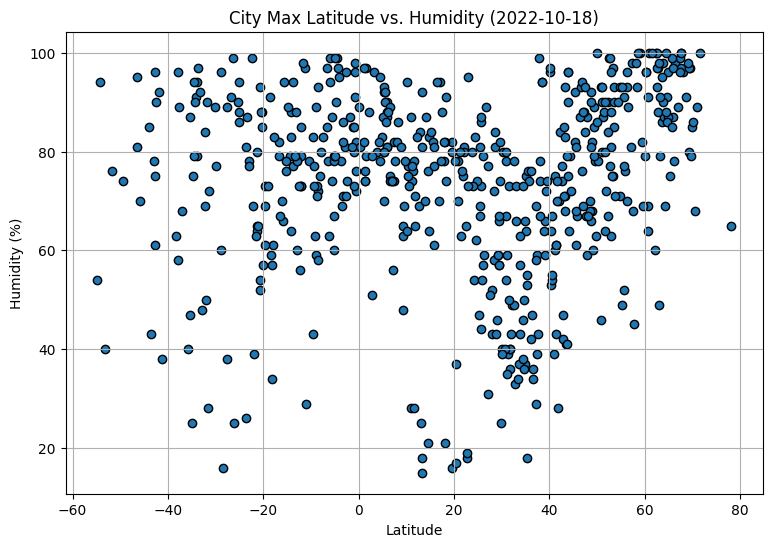

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hd = city_data_df["Humidity"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(lat, hd, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

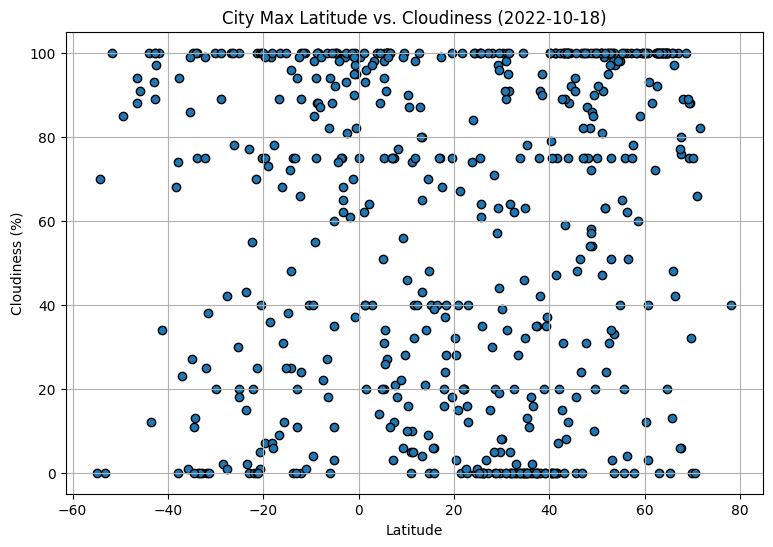

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cld = city_data_df["Cloudiness"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat, cld, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

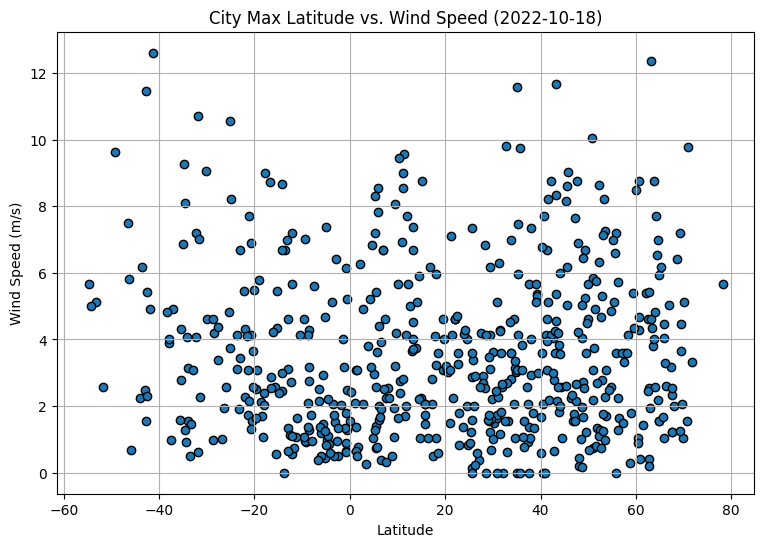

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
ws = city_data_df["Wind Speed"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat, ws, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
import numpy as np

def linearReg(x_values, y_values, xlabel, ylabel, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    correlation = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {round(correlation[0], 4)}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq, ( (np.mean(x_values) * 0.8) , (np.mean(y_values) * 0.8) ), color='r')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"../output_data/LinReg{label}.png")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,4.73,45,0,3.60,US,1701129772
2,utrik,11.2278,169.8474,27.70,74,74,8.54,MH,1701129773
3,yellowknife,62.4560,-114.3525,-6.71,100,100,4.63,CA,1701129688
6,nar'yan-mar,67.6713,53.0870,-20.30,100,76,1.21,RU,1701129775
7,eregli,37.5133,34.0467,-1.08,59,35,1.38,TR,1701129776


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.12,68,23,4.93,SH,1701129771
4,punta arenas,-53.1500,-70.9167,12.06,40,0,5.14,CL,1701129546
5,waitangi,-43.9535,-176.5597,14.34,85,100,2.24,NZ,1701129774
9,adamstown,-25.0660,-130.1015,22.98,86,100,10.56,PN,1701129777
11,ushuaia,-54.8000,-68.3000,10.81,54,0,5.66,AR,1701129779


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8567


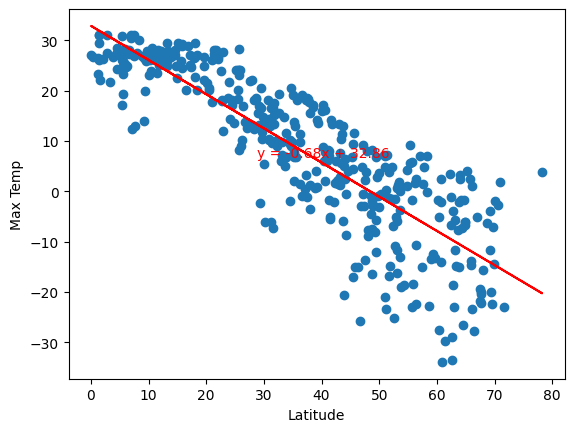

In [16]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots

linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='North1'
         )


The r-value is: 0.6586


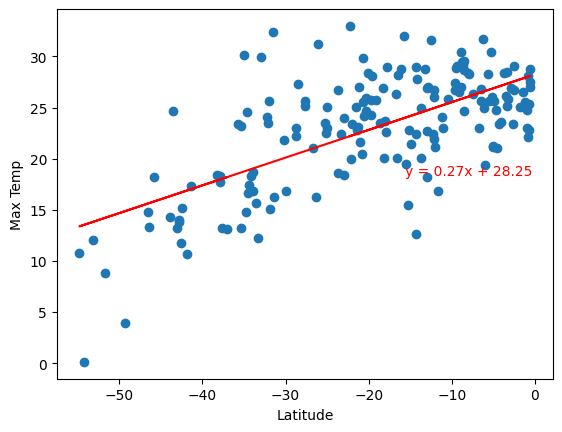

In [17]:
# Linear regression on Southern Hemisphere

linearReg(southern_hemi_df["Lat"], 
          southern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='South1'
         )


**Discussion about the linear relationship:** Both relationships have a strong correlation. For our subset of northern hemiphere cities, the relationship between the latitude and max recorded temperature is negative as you move farther from the equator. On the other hand, the southern hemiphere cities have a strong positive relationship with max temperature as they get closer to the equator. This supports the leading hypothesis that temperatures increase as you move closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2343


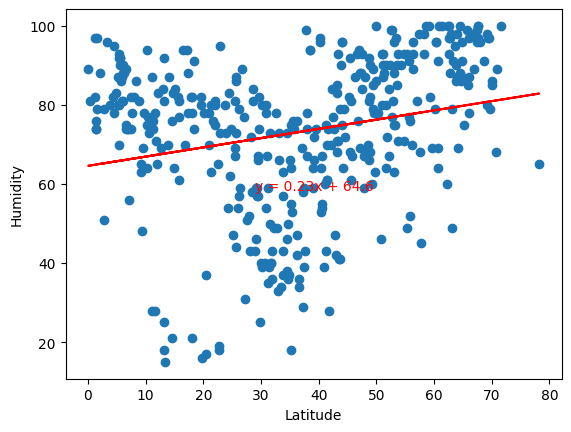

In [18]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Humidity"], 
          xlabel="Latitude", 
          ylabel="Humidity",
          label='North2'
         )


The r-value is: 0.1771


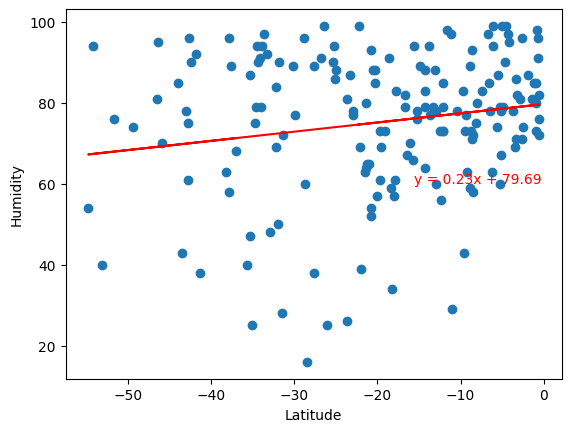

In [19]:
# Southern Hemisphere

linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Humidity"],
          xlabel="Latitude",
          ylabel="Humidity",
          label='South2'
         )


**Discussion about the linear relationship:** Both relationships are fairly weakly correlated. In both cases, the relationship between latitude and humidity trends slightly upward. However, it would be difficult to characterize this relationship as statistically significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1987


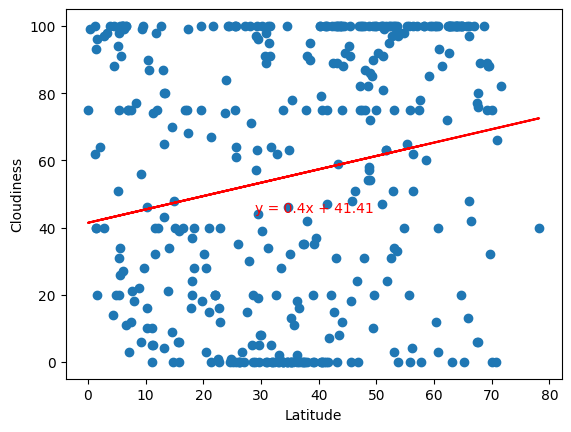

In [20]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Cloudiness"], 
          xlabel="Latitude", 
          ylabel="Cloudiness",
          label='North3'
         )


The r-value is: 0.1496


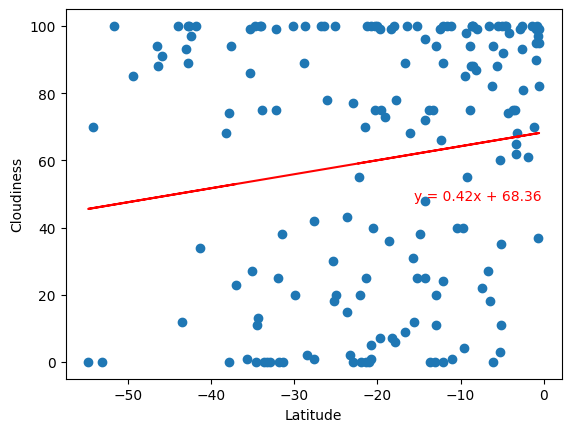

In [21]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Cloudiness"],
          xlabel="Latitude",
          ylabel="Cloudiness",
          label='South3'
         )


**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity, both relationships are loosely correlated. There is a slight upward trend, but the distribution of values across the plane is fairly random. One interesting takeaway is that the northern cities appear to be cloudier than the southern ones, but there are also more northern cities in the relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0671


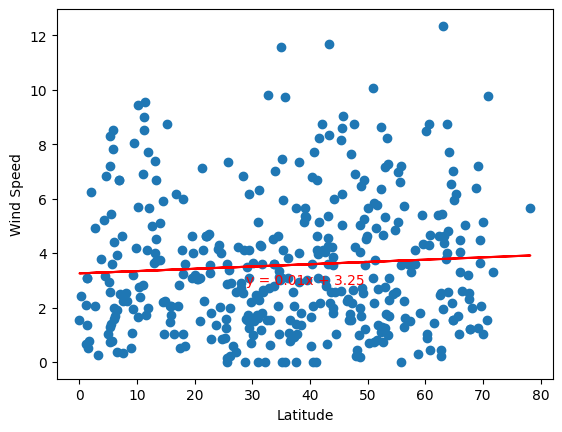

In [22]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Wind Speed"], 
          xlabel="Latitude", 
          ylabel="Wind Speed",
          label='North4'
         )


The r-value is: -0.1287


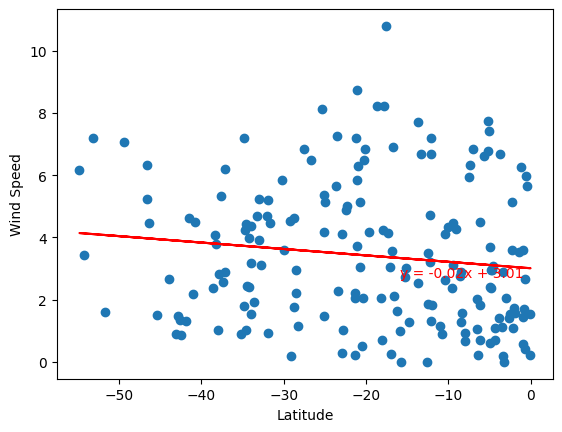

In [31]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Wind Speed"],
          xlabel="Latitude",
          ylabel="Wind Speed",
          label='South4'
         )


**Discussion about the linear relationship:** The relationship between latitude and wind speed is stronger than the correlation between latitude and cloudiness or humidity; however, not by a whole lot more. These data portray a pretty constant realtionship between latitude and wind speed that would most likely be support the null hypothesis. In other words, it seems likely that knowing the latitiude does not have any predictive power over the wind speed and vice versa. 